In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [244]:
data=pd.read_csv('C:\\Users\\Armaan\\OneDrive\\Desktop\\WORKSPACE\\Datasets\\Diabetes\\diabetes.csv')

In [245]:
data.shape

(768, 9)

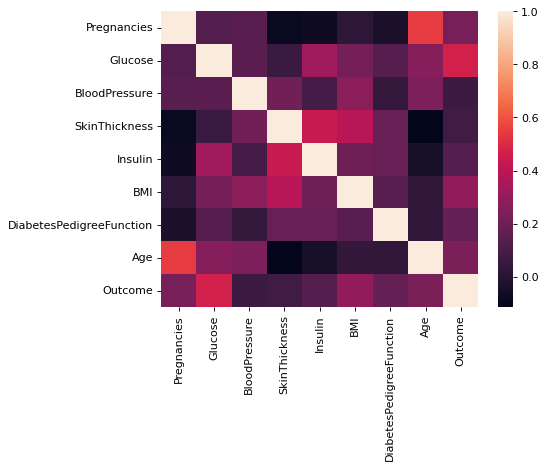

In [246]:
plt.figure(dpi=80)
heatmap=sns.heatmap(data.corr())
plt.show()

In [247]:
"""for i in range(8):
    data.iloc[:,i]=(data-data.iloc[:,i].min())/(data.iloc[:,i].max()-data.iloc[:,i].min())"""

'for i in range(8):\n    data.iloc[:,i]=(data-data.iloc[:,i].min())/(data.iloc[:,i].max()-data.iloc[:,i].min())'

In [289]:
x=np.array(data.iloc[:,:7])
y=np.array(data.iloc[:,8])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

rf=RandomForestClassifier(random_state=0,max_depth=6)
rf.fit(x_train,y_train)
rf.score(x_train,y_train),rf.score(x_test,y_test)

(0.8836805555555556, 0.7864583333333334)

In [270]:
data["Glucose^3"]=data["Glucose"]**3
#data["Glucose^2"]=data["Glucose"]**2
#data["BMI^2"]=data["BMI"]**2
#data["BMI*Glucose"]=data["BMI"]*data["Glucose"]
data=data.iloc[:,[0,1,2,3,4,5,6,7,9,8]]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose^3
0,6,148,72,35,0,33.6,0.627,50,1,3241792
1,1,85,66,29,0,26.6,0.351,31,0,614125
2,8,183,64,0,0,23.3,0.672,32,1,6128487
3,1,89,66,23,94,28.1,0.167,21,0,704969
4,0,137,40,35,168,43.1,2.288,33,1,2571353
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1030301
764,2,122,70,27,0,36.8,0.340,27,0,1815848
765,5,121,72,23,112,26.2,0.245,30,0,1771561
766,1,126,60,0,0,30.1,0.349,47,1,2000376


In [271]:
x=np.array(data.iloc[:,:8])
y=np.array(data.iloc[:,9])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [273]:
rf=RandomForestClassifier(random_state=0,max_depth=6)
rf.fit(x_train,y_train)
rf.score(x_train,y_train),rf.score(x_test,y_test)

(0.8055555555555556, 0.22916666666666666)

In [260]:
"""import sys
max_score=-sys.maxsize
best_k=0
for i in range(3,20,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=np.mean(cross_val_score(knn,x_train,y_train))
    if(score>max_score):
        max_score=score
        best_k=i"""
knn=KNeighborsClassifier(n_neighbors=7)

In [261]:
knn.fit(x_train,y_train)
predict=knn.predict(x_test)

c:\Users\Armaan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [262]:
confusion_matrix(predict,y_test)

array([[111,  27],
       [ 19,  35]], dtype=int64)

In [263]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       138
           1       0.56      0.65      0.60        54

    accuracy                           0.76       192
   macro avg       0.71      0.73      0.72       192
weighted avg       0.77      0.76      0.77       192



In [264]:
knn.score(x_test,y_test)

c:\Users\Armaan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7604166666666666